### Very Basic Extraction of Possibly Relevant Quotes

In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
politicians = pd.read_csv("data/politicians.csv")

In [19]:
names = politicians.speaker

In [20]:
words = ['lesbian', 'gay', 'homosexual', 'gender', 'bisexual', 'sexuality', 'same sex'] # obviously add more

In [21]:
politicians

,state,speaker
0,Alabama,Richard Shelby
1,Alabama,Tommy Tuberville
2,Alaska,Lisa Murkowski
3,Alaska,Dan Sullivan
4,Arizona,Kyrsten Sinema
...,...,...
690,Texas,Van Taylor
691,Texas,Veronica Escobar
692,Florida,W. Gregory Steube
693,South Carolina,William R. Timmons IV


One way to upload the data: 
however it needs real large files, so we worked with an already made dataframe (created on the most robust computer of our group)

In [16]:
# only take rows with speakers in the congress or senator files
# only take rows with quotations that contain relevant words
chunk_num = 1
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        
        return chunk.loc[chunk.speaker.isin(names) & (chunk.quotation.str.contains('{}'.format("|".join(words))))]
            
        

with pd.read_json('data/quotes-2015.json.bz2', lines=True, compression='bz2', chunksize=100000) as df_reader:
    for chunk in df_reader:
        processed_chunk = process_chunk(chunk)
        if (chunk_num == 1):
            dataframe15 = processed_chunk
            chunk_num += 1
        else:
            dataframe15 = pd.concat([dataframe15, processed_chunk])

KeyboardInterrupt: 

The already made dataframe:

In [22]:
# Merge quote data with speaker state data
dataframe15=pd.read_csv("data/df15.csv")
merged = pd.merge(dataframe15, politicians, on='speaker', how='inner').drop(columns=['state_y', 'Unnamed: 0'])
merged.sample(5)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,state_x
319,2015-09-23-074527,"Obviously, I disagree with the Pope on a woman...",Bernie Sanders,['Q359442'],2015-09-23 12:19:36,4,"[['Bernie Sanders', '0.8011'], ['Chris Hayes',...",['http://talkingpointsmemo.com/livewire/bernie...,E,Vermont
506,2015-05-28-012600,"First of all, if the majority of Americans sup...",Marco Rubio,['Q324546'],2015-05-28 07:57:50,1,"[['Marco Rubio', '0.8558'], ['None', '0.1295']...",['http://bloomberg.com/politics/articles/2015-...,E,Florida
341,2015-08-21-099535,They divide people on gay marriage. They divid...,Bernie Sanders,['Q359442'],2015-08-21 16:16:01,1,"[['Bernie Sanders', '0.8105'], ['None', '0.184...",['http://www.advocate.com/politics/election/20...,E,Vermont
472,2015-07-21-095578,There is a gender card being played in this ca...,Mitch McConnell,['Q355522'],2015-07-21 10:33:25,6,"[['Mitch McConnell', '0.5699'], ['None', '0.35...",['http://feeds.wired.com/c/35185/f/661370/s/48...,E,Kentucky
795,2015-09-30-034949,I don't care [ about ] her gender. What I care...,Jason Chaffetz,['Q1683881'],2015-09-30 15:42:44,1,"[['Jason Chaffetz', '0.7143'], ['None', '0.119...",['http://insider.foxnews.com/2015/09/30/dems-s...,E,Utah


In [23]:
print("size of the data:",merged.shape)

size of the data: (844, 10)


To get an insight into the kind of quotations we are working with:

In [24]:
merged.quotation.sample(10)

301    The time is long overdue for us to bring our p...
515    based on their skill and their ability, and no...
408    then have you demagogues like Trump come along...
171                 We have no hatred toward gay people.
766    I believe in equal rights for all Americans, r...
549    Aaron wears stylish clothing and yet he's not ...
820    While we oftentimes may share an adversary wit...
138    not saying with certainty that the gunman was ...
139    On the Democratic side, the major donors that ...
89     Can I ask you a question? So, I'm a big suppor...
Name: quotation, dtype: object

Visualisation by states

In [25]:
merged.state_x.value_counts()

Texas                   198
Vermont                 158
Florida                  91
California               62
Kentucky                 51
Illinois                 31
South Carolina           24
New York                 17
Colorado                 14
Wisconsin                13
Washington               12
Iowa                     12
New Jersey               11
Ohio                     11
Georgia                  11
Arizona                  11
Hawaii                   10
Kansas                    9
Arkansas                  8
Utah                      8
Maine                     8
Virginia                  7
Oregon                    6
Louisiana                 6
Tennessee                 5
Alaska                    5
Oklahoma                  5
Massachusetts             5
Maryland                  4
Nevada                    4
Pennsylvania              3
Minnesota                 3
Connecticut               3
Nebraska                  3
Michigan                  3
District of Columbia

**Let's see what is the distribution of speakers per state on the matter of gay rights**

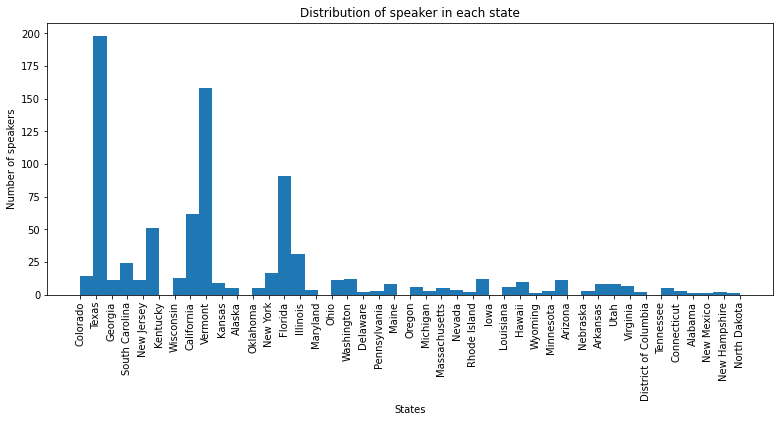

In [26]:
plt.figure(figsize=(13,5))
plt.hist(merged.state_x, bins= 50)
plt.xlabel('States')
plt.ylabel('Number of speakers')
plt.title('Distribution of speaker in each state')
plt.xticks(rotation = 90)
plt.show()

#### We can do the same for each year...

In [28]:
dataframe20=pd.read_csv("data/df20.csv")
merged_ = pd.merge(dataframe20, politicians, on='speaker', how='inner')
merged20=merged_.drop(columns=['state_y', 'Unnamed: 0'])
merged20.sample(5)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,state_x
249,2020-02-13-057794,It's not going to have the kind of widespread ...,Jackie Speier,['Q218544'],2020-02-13 11:48:04,1,"[['Jackie Speier', '0.4607'], ['None', '0.4588...",['https://www.politico.com/news/2020/02/13/hou...,E,California
140,2020-02-07-103934,"We are one people, and I don't care if you're ...",Bernie Sanders,['Q359442'],2020-02-07 11:04:00,1,"[['Bernie Sanders', '0.9277'], ['None', '0.072...",['https://forward.com/fast-forward/439595/bern...,E,Vermont
109,2020-01-29-023058,gender-inclusive computer science enrichment p...,Jacky Rosen,['Q27825033'],2020-01-29 02:00:00,1,"[['Jacky Rosen', '0.6475'], ['None', '0.3525']]",['https://lasvegassun.com/news/2020/jan/29/ros...,E,Nevada
20,2020-02-20-032544,I'd like to talk about who we are running agai...,Elizabeth Warren,['Q434706'],2020-02-20 05:49:18,1,"[['Elizabeth Warren', '0.4864'], ['None', '0.4...",['http://www.bostonglobe.com/2020/02/20/metro/...,E,Massachusetts
11,2020-02-21-081591,What we need to know is exactly what's lurking...,Elizabeth Warren,['Q434706'],2020-02-21 21:41:59,1,"[['Elizabeth Warren', '0.8144'], ['None', '0.1...",['https://thefederalist.com/2020/02/21/bloombe...,E,Massachusetts


**Now, we want to see the distribution of hatecrime due to sexual orientation in each state.**

In [29]:
#Let's upload our data on hatecrime:
#We only keep data relevant for our subject, that is sexual orientation and gender identity
hc2015=pd.read_csv('data/hatecrime2015.csv')
hc2015.sort_index()
hc2015=hc2015.drop(columns=['Agency Type', 'Race/\nEthnicity/\nAncestry', 'Religion','Disability','Gender', '1st\nquarter'
                    , '2nd\nquarter','3rd\nquarter', '4th\nquarter', 'Agency name' ])

In [30]:
#remove unrelevant line spotted in the file
for i in range(hc2015.shape[0]):
    if (hc2015.State.loc[i]=='3 Includes one incident reported with more than one bias motivation.'):
        hc2015.State.loc[i]='NaN'

C:\Users\aguer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [31]:
#The state value is filled once and then only NaN value for all the following rows until new state, therefore we fill in
# the NaN value with the relevant State 
hc=hc2015.fillna(method='ffill', axis=0)
hc=hc.rename(columns = {'Sexual\norientation': 'sexual_orientation', 'Gender\nIdentity': 'gender_identity'})

In [32]:
#last lines are non valid, therefore we drop them
hc=hc.drop(labels=[1980,1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], axis=0)

In [33]:
nb_hc=hc.groupby(['State']).sum()

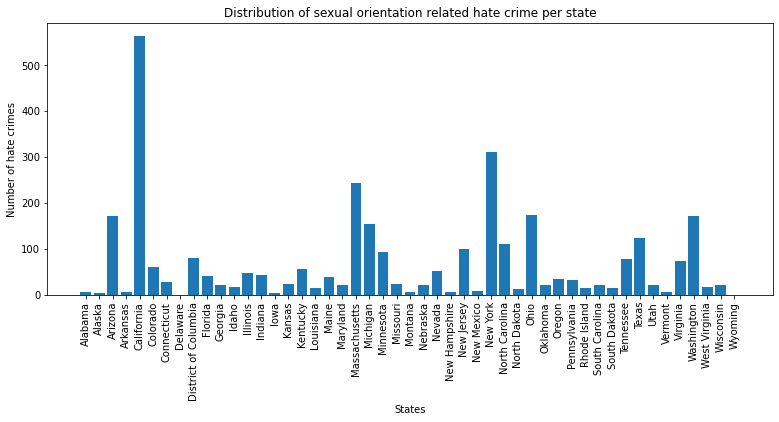

In [34]:
#let's plot the distribution of sexual orientation related hate crime per state
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.sexual_orientation)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of sexual orientation related hate crime per state')
plt.xticks(rotation = 90)
plt.show()

We can see that California has the highest number of hate crime related to sexual orientation. It is interesting to point it out as we have seen in the previous plot that California has lots of speakers on the matter of gay rights. 

Indeed, after looking up on Internet, hate crimes with a sexual orientation bias are the second most common type of hate crime over 2006-2015 in California.

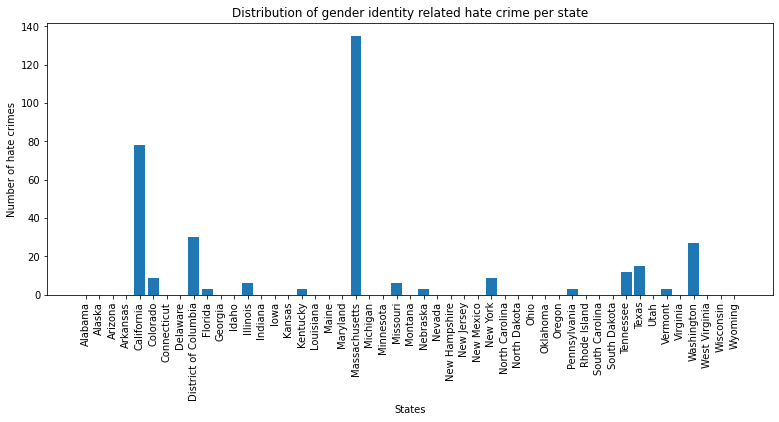

In [35]:
#same plot but for gender identity
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.gender_identity)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of gender identity related hate crime per state')
plt.xticks(rotation = 90)
plt.show()

We can see that gender identity related hate crime are not present in lots of state. It is probably because in 2015, we were less talking about gender identity than nowadays. Therefore, probably less people reported it as gender identity hate crime.
Nevertheless, we can see that in Massachussetts and California, there have been important number of agressions. For Massachussetts, there are approximately same number of hate crime due to gender identity and sexual orientation, therfeore the whole lgbtqa+ community is very much targeted. 

In [40]:
#get the number of occurences of all the quotations for a state
grouped_by_state = merged.groupby('state_x').agg({'numOccurrences' : sum})#sum()

#Add a column with the number of different quotations for a state
grouped_by_state['numQuotations']= merged.state_x.value_counts()
grouped_by_state.sort_values(by = 'numOccurrences', ascending=False)

,numOccurrences,numQuotations
state_x,,
Vermont,980,158
Texas,625,198
Florida,312,91
Kentucky,258,51
Utah,165,8
California,104,62
Massachusetts,95,5
Arkansas,95,8
South Carolina,92,24


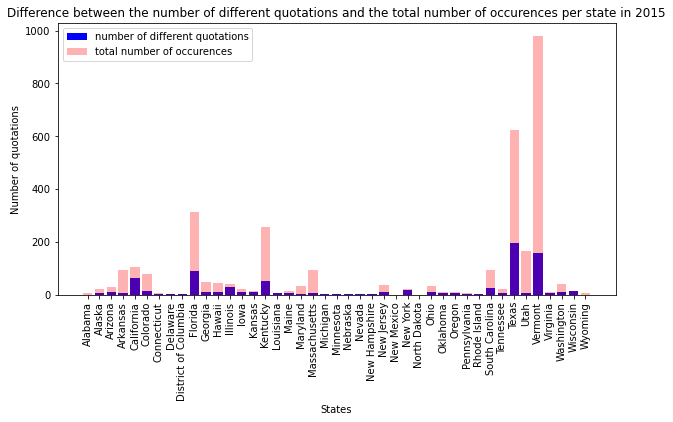

In [44]:
#visualization of the above table:
plt.figure(figsize=(10,5))
plt.bar(grouped_by_state.index, grouped_by_state.numQuotations, color='blue', label = "number of different quotations" )
plt.bar(grouped_by_state.index, grouped_by_state.numOccurrences, alpha=0.3, color='red', label="total number of occurences")
plt.legend(loc='best')
plt.xlabel('States')
plt.ylabel('Number of quotations')
plt.title('Difference between the number of different quotations and the total number of occurences per state in 2015')
plt.xticks(rotation=90)
plt.show()

This graph which represents differences between the number of different quotations and total number of occurences per state allows us to deduce if the topic of LGBT community is in the spotlights in specific states. 

Indeed, we can directly see in which sates there are a larger number of quotations and how many times they are quoted. For example, we can observe that in the state of vermont, the subject is widely spoken whereas in New Mexico there is only one quotation about the topic.

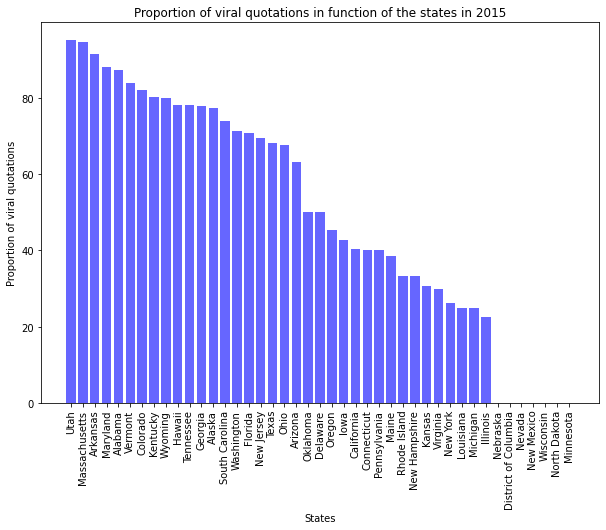

In [55]:
grouped_by_state['proportional_numQuotations'] = (grouped_by_state.numQuotations/grouped_by_state.numOccurrences)*100
grouped_by_state=grouped_by_state.sort_values(by= 'proportional_numQuotations', ascending=True)
plt.figure(figsize=(10,7))
plt.bar(grouped_by_state.index, 100-grouped_by_state.proportional_numQuotations, color='blue', alpha=0.6, label = "number of different quotations" )
plt.xlabel('States')
plt.ylabel('Proportion of viral quotations')
plt.xticks(rotation=90)
plt.title("Proportion of viral quotations in function of the states in 2015")
plt.show()

This graph presents the proportion of viral quotations for each state.
In fact, we compute the percentage of the number of diferrent quotations over the total numbers of occurences of quotations for each state and displays 100 minus this proportion to get the proportion of viral quotations. 

If there is a low number of quotations in a specific state and the total number of occurences is very high, this means that these quotations were widely quoted by other speakers or in media supports such as articles and that we talked a lot about it. We assume that if we discuss and mention many times a quotation, it went viral and may be polemical.

For example, in Utah,the proportion of different quotations is very low. This means there is a high number of occurences for just a few different quotations. We see in the previous table that it is on a significant number of occurences. Concretely, it means it is probably a polemi.

In [46]:
#file lgbt population:
lgbtpopulation=pd.read_csv("data/lgbtpopulation2021.csv")

#clean it:
lgbtpopulation=lgbtpopulation.dropna(how='any', axis=0)
lgbtpopulation.groupby("STATE").sum() #in case there are duplicates of states across rows
lgbtpopulation.sample(10)

,STATE,TOTAL ADULT POPULATION,LGBT ADULT POPULATION,LGBT POPULATION DENSITY,% OF LGBTQ INDIVIDUALS RAISING CHILDREN,% OF SAME-SEX COUPLES RAISING CHILDREN
5,CALIFORNIA,"39,557,045","1,859,000",5.300%,24.00%,16.00%
32,NEW JERSEY,"8,908,520","343,000",4.100%,25.00%,19.700%
24,MICHIGAN,"9,995,915","373,000",4.00%,27.00%,18.200%
4,ARKANSAS,"3,013,825","95,000",3.300%,36.00%,21.200%
50,VERMONT,"626,299","30,000",5.200%,23.00%,18.600%
9,DISTRICT OF COLUMBIA,"702,455","58,000",9.800%,9.00%,8.700%
34,NEW YORK,"19,542,209","913,000",5.100%,22.00%,16.400%
6,COLORADO,"5,695,564","234,000",4.600%,25.00%,15.900%
35,NORTH CAROLINA,"10,383,620","382,000",4.00%,26.00%,18.500%
31,NEW HAMPSHIRE,"1,356,458","59,000",4.700%,31.00%,16.500%


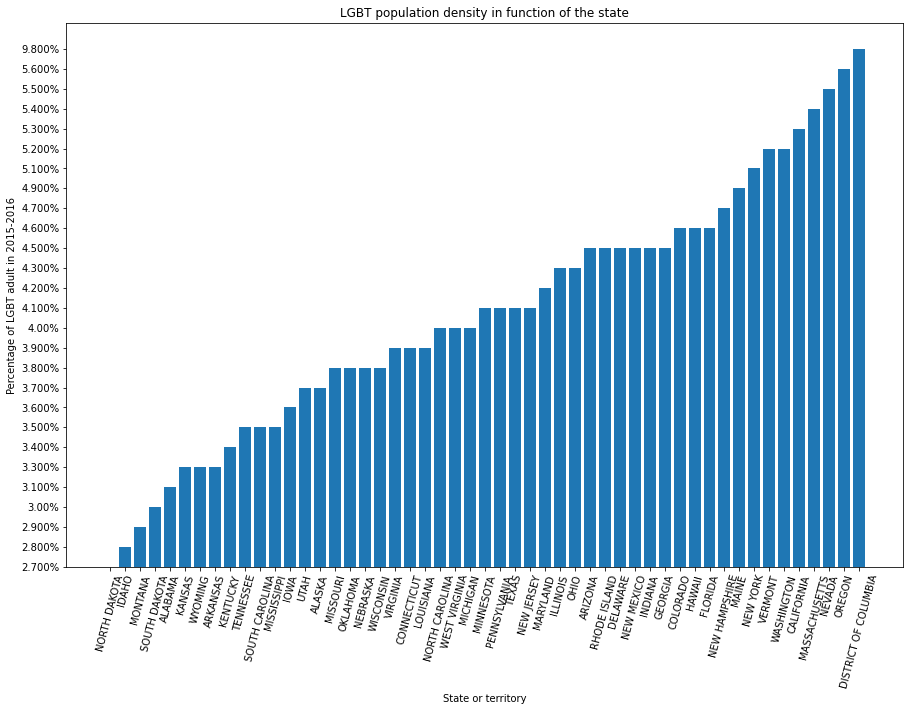

In [47]:
lgbtpopulation=lgbtpopulation.sort_values(by=['LGBT POPULATION DENSITY'], axis=0)
plt.figure(figsize=(15,10))
plt.bar(lgbtpopulation['STATE'],lgbtpopulation['LGBT POPULATION DENSITY'])
plt.title("LGBT population density in function of the state")
plt.xticks(rotation=75)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.show()

We can see that North Dakota is the state with the smallest percentage of LGBT adults for the years 2015-2016, while in Oregon or in the District of Colombia the density is way higher. Note that these data are obtained from surveys (we guess) thus it doesn't correspond to the exact reality as some people may have not tell the truth or filled the form. Further studies will be interesting to see if these states are related to the ones where we have the more quotations, or how they are related to hate crimes for example.

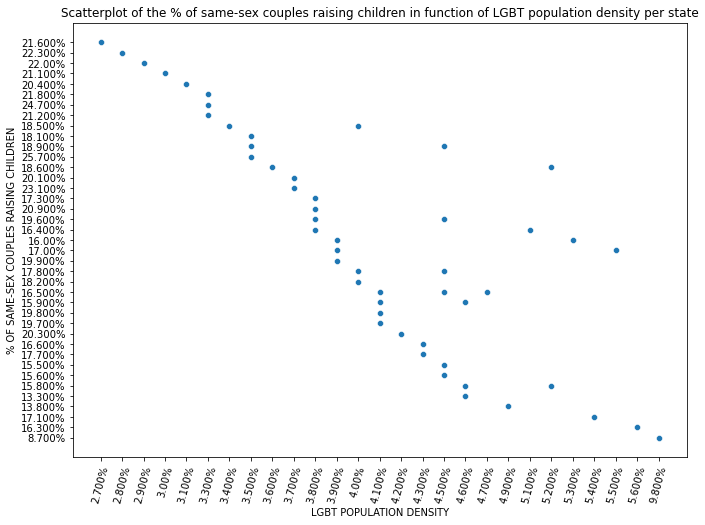

In [48]:
#Correlation between LGBT population density and percentage of same-sex couples raising children
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)
plt.xticks(rotation=75)
sns.scatterplot(data=lgbtpopulation, x='LGBT POPULATION DENSITY', y='% OF SAME-SEX COUPLES RAISING CHILDREN', ax=ax).set(title="Scatterplot of the % of same-sex couples raising children in function of LGBT population density per state") 
plt.show()

We will discuss it later, here we are just doing some pre-processing steps and visualizations but it seems that we have a negative correlation between these two categories.

In [49]:
#file lgbtsummary
lgbtsummary=pd.read_csv("data/lgbtsummary.csv")
lgbtsummary=lgbtsummary[:-1] #remove last row to sort by increasing population rank
lgbtsummary=lgbtsummary[['Pop.rank', 'State or territory', '2015–2016 LGBTadult percentageestimate[7]', 
                         '2016 transgender adult percentage estimate[2]']]
lgbtsummary=lgbtsummary.rename(columns={"2015–2016 LGBTadult percentageestimate[7]": 
                                        "Percentage of LGBT adult in 2015-2016", 
                                        "2016 transgender adult percentage estimate[2]": 
                                        "Percentage of transgender adult in 2016"})
lgbtsummary.head(lgbtsummary.shape[0]) #just to check that it is well ordered throughout the dataframe


,Pop.rank,State or territory,Percentage of LGBT adult in 2015-2016,Percentage of transgender adult in 2016
0,1,California,4.8%,0.76%
1,2,Texas,3.6%,0.66%
2,3,New York,4.5%,0.51%
3,4,Florida,4.2%,0.66%
4,5,Illinois,3.7%,0.51%
5,6,Ohio,3.8%,0.45%
6,7,Michigan,3.8%,0.43%
7,8,Georgia,4.0%,0.75%
8,9,Pennsylvania,3.6%,0.44%
9,10,New Jersey,3.6%,0.44%


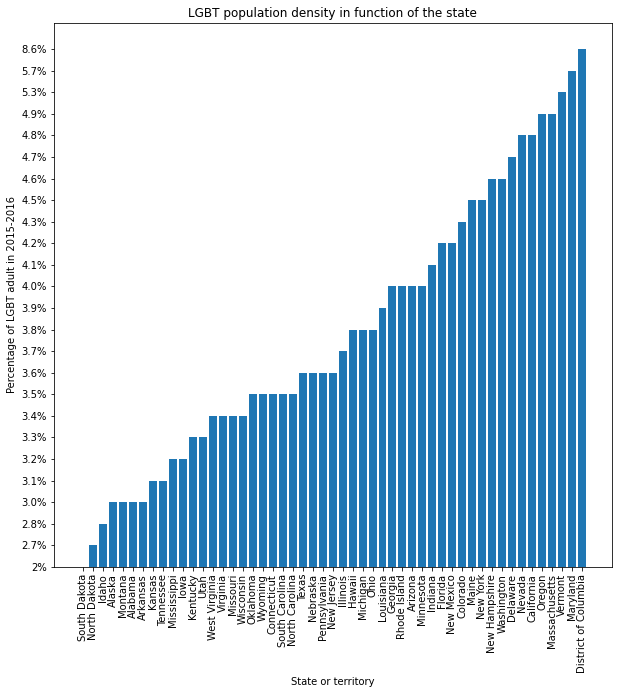

In [50]:
lgbtsummary=lgbtsummary.sort_values(by='Percentage of LGBT adult in 2015-2016', axis=0)
plt.figure(figsize=(10,10))
plt.bar(lgbtsummary['State or territory'],lgbtsummary['Percentage of LGBT adult in 2015-2016'])
plt.xticks(rotation=90)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.title("LGBT population density in function of the state")
plt.show()

It shows similar results as in lgbtpopulation.

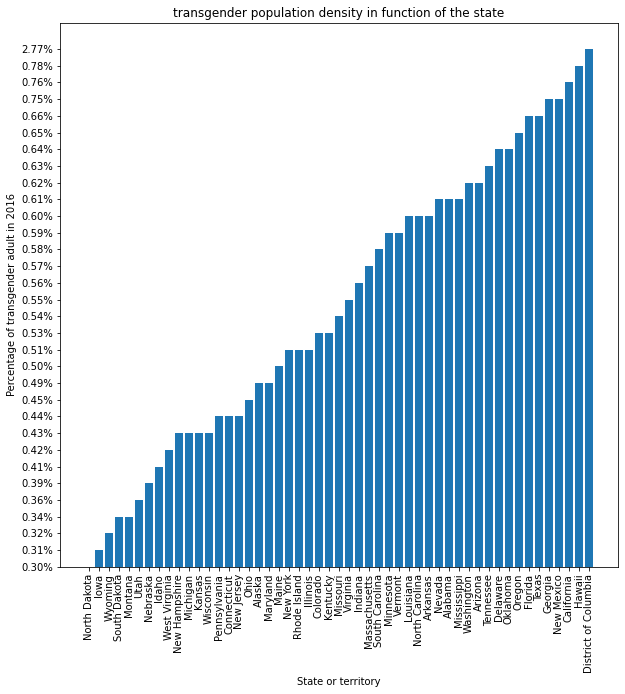

In [51]:
lgbtsummary=lgbtsummary.sort_values(by='Percentage of transgender adult in 2016', axis=0)
plt.figure(figsize=(10,10))
plt.bar(lgbtsummary['State or territory'],lgbtsummary['Percentage of transgender adult in 2016'])
plt.xticks(rotation=90)
plt.xlabel("State or territory")
plt.ylabel("Percentage of transgender adult in 2016")
plt.title("transgender population density in function of the state")
plt.show()

Same as for the lgbt population: the states with the highest and smallest density are respectively District of Columbia and North Dakota.